<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.----DT-Ensemble/blob/main/Decision_trees/Mahfuzur_Rahman_DecisionTree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'white', color_codes = True)

In [ ]:
url = 'https://raw.githubusercontent.com/Tech-i-s/data-science-course-wiki/master/Step%203-3%20DT%20and%20Ensemble/01_Decision-trees/iris.csv?token=AM2M2NYBXPT77OVDM7JPBQ3AHWS2I'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.select_dtypes(exclude = 'number').nunique()
# we can see that species has 300

species    3
dtype: int64

In [ ]:
print(f'The dimension of the dataset {df.shape}')

The dimension of the dataset (150, 5)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

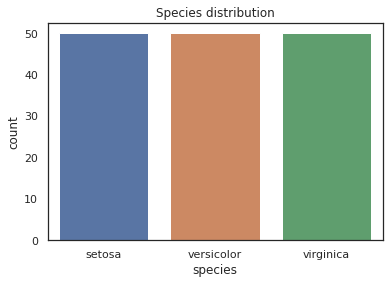

In [ ]:
# count plot for Species
sns.countplot(data = df, x = 'species')
plt.title('Species distribution');

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

# encode label in columns 
df['species'] = label_encoder.fit_transform(df['species'])

In [ ]:
set(df.species)

{0, 1, 2}

In [ ]:
df.species.unique()

array([0, 1, 2])

In [ ]:
np.unique(df.species)

array([0, 1, 2])

In [ ]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


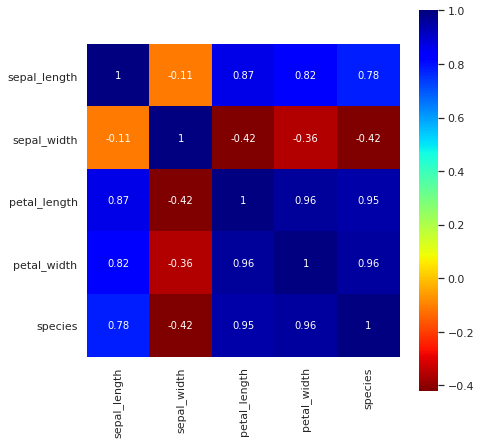

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), square=True, cmap='jet_r', annot = True)
plt.show();

In [ ]:
# absolute correlation value with species(Target variable)

abs(corr['species'][:-1]).sort_values(ascending = False)

petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width     0.419446
Name: species, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = .30)

In [ ]:
x_train = train.iloc[:,:-1]
y_train = train.loc[:, ['species']]
x_test = test.iloc[:,:-1]
y_test = test.loc[:, ['species']]

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [ ]:
# using desicion tree classifier 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 3, max_depth = 3, criterion = 'gini')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [ ]:
# predict Species for test data
pred = dtc.predict(x_test)

In [ ]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the Decision Tree is 97.78%


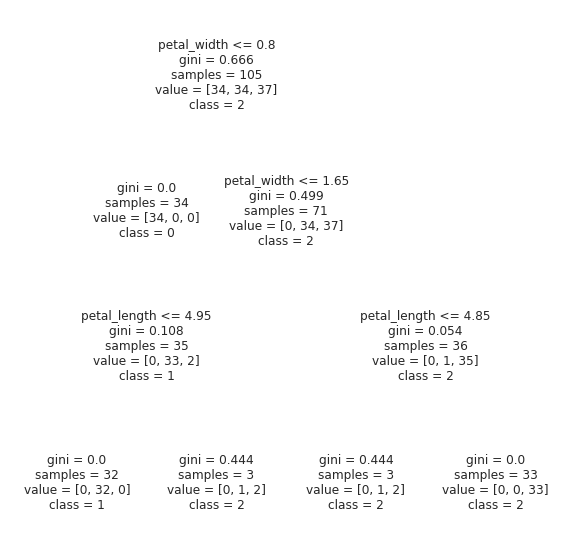

In [ ]:
#Model Visualization
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [ ]:
#Model visualization
from sklearn.tree.export import export_text
r = export_text(dtc, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_width <= 1.65
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal_length >  4.95
|   |   |   |--- class: 2
|   |--- petal_width >  1.65
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Using Decision Tree Classifier for model building by "entropy"

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predict Species for test data
pred1 = clf1.predict(x_test)
pred1

array([2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       1])

In [ ]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred1,y_test)*100,2)))

The accuracy of the Decision Tree is 97.78%


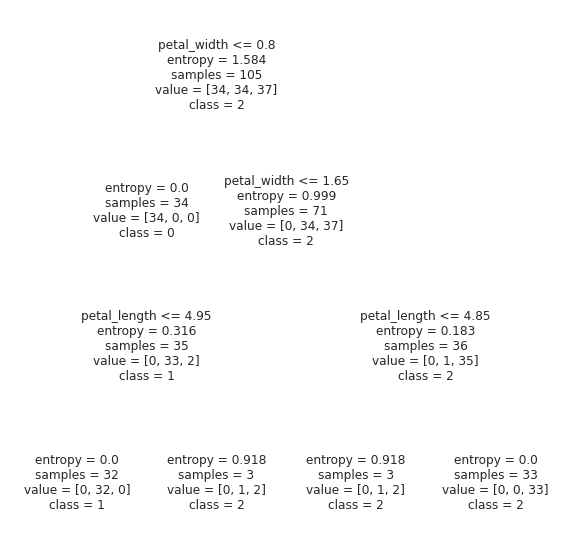

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf1,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [ ]:
#Model visualization
from sklearn.tree.export import export_text
r = export_text(clf1, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_width <= 1.65
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal_length >  4.95
|   |   |   |--- class: 2
|   |--- petal_width >  1.65
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2



In [ ]:
# tuning the parameters using grid search CV
from sklearn.model_selection import GridSearchCV
tree_params = {'criterion':['gini', 'entropy'],
               'max_depth': list(range(1,6,1)),
               'min_samples_leaf': list(range(1,7,1))}
gsCV = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_params, cv=3)
gsCV.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
             

In [ ]:
best_parameters = gsCV.best_estimator_
best_parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:

#Print hyperparameter
print("Tuned hyperparameter: {}".format(gsCV.best_params_)) 
print("Best score: {}".format(gsCV.best_score_))

Tuned hyperparameter: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
Best score: 0.942857142857143


In [ ]:
#Using best hyperparameter
DT = best_parameters.fit(x_train, y_train)
pred = DT.predict(x_test)
acc = accuracy_score(pred,y_test)
print('The accuracy of the Decision tree after hyperparameter tuning: {}%'.format(round(acc*100,2)))

The accuracy of the Decision tree after hyperparameter tuning: 93.33%
